In [7]:
from pathlib import Path
import sys

helper_utils = Path(Path.cwd(), 'utils')
sys.path.append(str(helper_utils))

import utils
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch

checker = utils.core.ExerciseChecker("SE02")

![](figs/se_02.png)
# Workshop Instructions
***
- <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> Follow along by typing the code yourself - this helps with learning!
- <img src="figs/icons/code.svg" width="20" style="filter: invert(100%) sepia(100%) saturate(2000%) hue-rotate(40deg) brightness(915%) contrast(100%);"/> Code cells marked as "Exercise" are for you to complete
- <img src="figs/icons/reminder.svg" width="20" style="filter: invert(100%) sepia(1500%) saturate(1500%) hue-rotate(30deg) brightness(450%) contrast(70%);"/> Look for hints if you get stuck
- <img src="figs/icons/success.svg" width="20" style="filter: invert(56%) sepia(71%) saturate(5293%) hue-rotate(117deg) brightness(95%) contrast(101%);"/> Compare your solution with the provided answers
- <img src="figs/icons/list.svg" width="20" style="filter: invert(19%) sepia(75%) saturate(6158%) hue-rotate(312deg) brightness(87%) contrast(116%);"/> Don't worry if you make mistakes - debugging is part of learning!

# Artificial Neural Networks
***
Artificial Neural Networks (ANNs) are a class of machine learning models inspired by the structure and function of the human brain. They consist of interconnected nodes (neurons) organized in layers, which process and learn from data. ANNs are the foundation of deep learning. 


<figure style="background-color: white; border-radius: 10px; padding: 20px; text-align: center; margin: 0 auto;">
    <img src="figs\ann.png" alt="Artificial Neural Networks" align="center" style="width: 60%; height: auto; margin: 0 auto;">
</figure>

## Neurons
***
> <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> **Definition**: Neurons are the basic building blocks of ANNs, similar to biological neurons. Each neuron receives inputs, applies a transformation, and produces an output.

The basic shape of a neuron can be seen in the following figure:

<figure style="background-color: white; border-radius: 10px; padding: 20px; text-align: center; margin: 0 auto;">
    <img src="figs\single_neuron.png" alt="Single Neuron" align="center" style="width: 60%; height: auto; margin: 0 auto;">
</figure>

The neuron takes an input vector $ X $  and applies a linear transformation using weights $ W $ and biases $ b $. Let us first consider the case of a single neuron without any activation function. The output of the neuron can be expressed as:

$$ y = W \cdot X + b$$

Where:
- $ y $ is the output of the neuron.
- $ W $ is the weight vector, which determines the strength of the connections between the inputs and the neuron.
- $ X $ is the input vector, which represents the features of the data.
- $ b $ is the bias term, which allows the neuron to shift the activation function to better fit the data.
- $ \cdot $ represents the dot product between the weight vector and the input vector.

Using neurons in this fashion means that we can only solve linear problems. To solve non-linear problems, we need to add a non-linear activation function to the neuron. Thus, our enhanced neuron will look like this:

<figure style="background-color: white; border-radius: 10px; padding: 20px; text-align: center; margin: 0 auto;">
    <img src="figs\non_linenar_neuron.png" alt="Single Neuron" align="center" style="width: 60%; height: auto; margin: 0 auto;">
</figure>

The output of the neuron after applying the activation function can be expressed as:
$$ \hat{y} = f(W \cdot X + b)$$

Where:
- $ f $ is the activation function, which introduces non-linearity to the output of the neuron. Common activation functions include sigmoid, tanh, and ReLU (Rectified Linear Unit).
- $ \hat{y} $ is the output of the neuron after applying the activation function. We use the hat symbol to denote that this is the predicted output of the neuron. As we will see later, the predicted output of the neuron is not necessarily equal to the actual output of the neuron. The difference between the two is called the error.

Let's implement our neuron in python using PyTorch. We will create a class called `Neuron` that takes the input vector, weight vector, and bias term as arguments. The class will have a method called `forward` that computes the output of the neuron.

This is the first step in the training process, passing the inputs to the neuron and getting the output, and we will call this the *forward pass*.


In [8]:
# Exercise 1: Implementing a Neuron 🎯
# Implement:
# 1. The sigmoid function
# 2. The forward pass of a neuron
# 3. Create a neuron with the specified weights and bias
# 4. Define an input vector x with two features
# 5. Use the neuron to compute an output

def sigmoid(x:torch.Tensor) -> torch.Tensor:
    # The sigmoid function is defined as:
    # sigmoid(x) = 1 / (1 + exp(-x))
    return 1 / (1 + torch.exp(-x)) # Your code here

class Neuron:
    def __init__(self, weights:torch.Tensor, bias:torch.Tensor, activation:callable=sigmoid) -> None:
        # Initialize the neuron with weights, bias, and activation function
        self.weights = weights
        self.bias = bias
        self.activation = activation

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        # 1. Compute the linear transformation:
        # 2. Apply the activation function to the result
        # 3. Return the output
        linear_output = x @ self.weights + self.bias # Your code here
        output = self.activation(linear_output) # Your code here
        return output # Your code here
    
    def __repr__(self) -> str:
        """String representation of the neuron"""
        return f"Neuron(weights={self.weights}, bias={self.bias})"

# Example weights and bias
weights = torch.tensor([0, 1.0])
bias = torch.tensor([0.5])

# Create a neuron with the specified weights and bias
neuron = Neuron(weights, bias) # Your code here

# Define an input vector x with two features 
# with values 1.0, 2.0
x = torch.tensor([1.0, 2.0])  # Your code here

# Let's use our neuron to compute an output
output = neuron.forward(x) # Your code here

# Print the output to see the result
print(f"Output from neuron: {output}")

# ✅ Check your answer
answer = {
    'sigmoid': sigmoid,
    'neuron_output': output.item()
}
checker.check_exercise(1, answer)


Output from neuron: tensor([0.9241])
✅ sigmoid is correct!
✅ neuron_output is correct!

🎉 Excellent! All parts are correct!


## Loss Functions and Error Measurement
***
> <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> **Definition**: A loss function measures how far the predicted output of a model is from the actual target value.

### Why Do We Need to Measure Error?

When training neural networks, we need a way to quantify how well our model is performing. Loss functions provide a numerical measure of the error between the predicted values (outputs of our network) and the actual target values. The goal of training is to minimize this error.

Key reasons for measuring error:
1. **Optimization guidance**: The loss function guides the optimization process by indicating which direction to adjust weights and biases
2. **Performance evaluation**: Loss values help us track the model's performance during training
3. **Comparison**: Different models can be compared objectively using loss metrics
4. **Convergence detection**: A stable or increasing loss can indicate when training should stop

### Common Loss Functions

Different types of problems require different loss functions:

1. **Mean Squared Error (MSE)** - For regression problems:
   $$ MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 $$

2. **Binary Cross-Entropy Loss** - For binary classification:
   $$ BCE = -\frac{1}{n}\sum_{i=1}^{n}[y_i \log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)] $$

3. **Categorical Cross-Entropy Loss** - For multi-class classification:
   $$ CCE = -\frac{1}{n}\sum_{i=1}^{n}\sum_{c=1}^{C}y_{ic} \log(\hat{y}_{ic}) $$

Where:
- $y_i$ is the true target value
- $\hat{y}_i$ is the predicted value from our neuron
- $n$ is the number of samples
- $C$ is the number of classes (for multi-class classification)

The process of training a neural network involves calculating these errors and then adjusting the weights and biases to minimize the error - a process called backpropagation.

interactive(children=(FloatSlider(value=0.0, description='Weight:', max=5.0, min=-1.0), FloatSlider(value=0.0,…

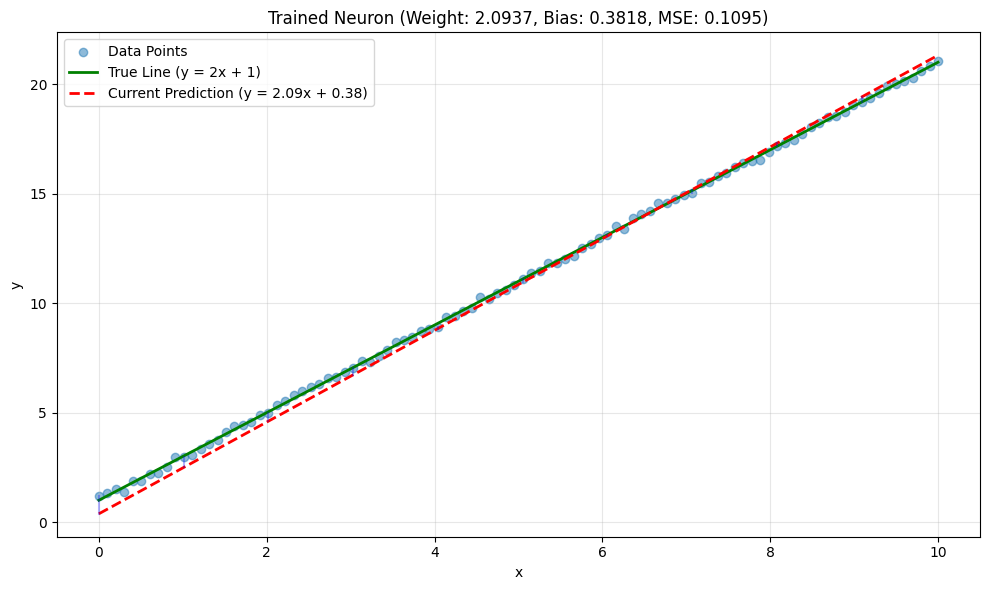

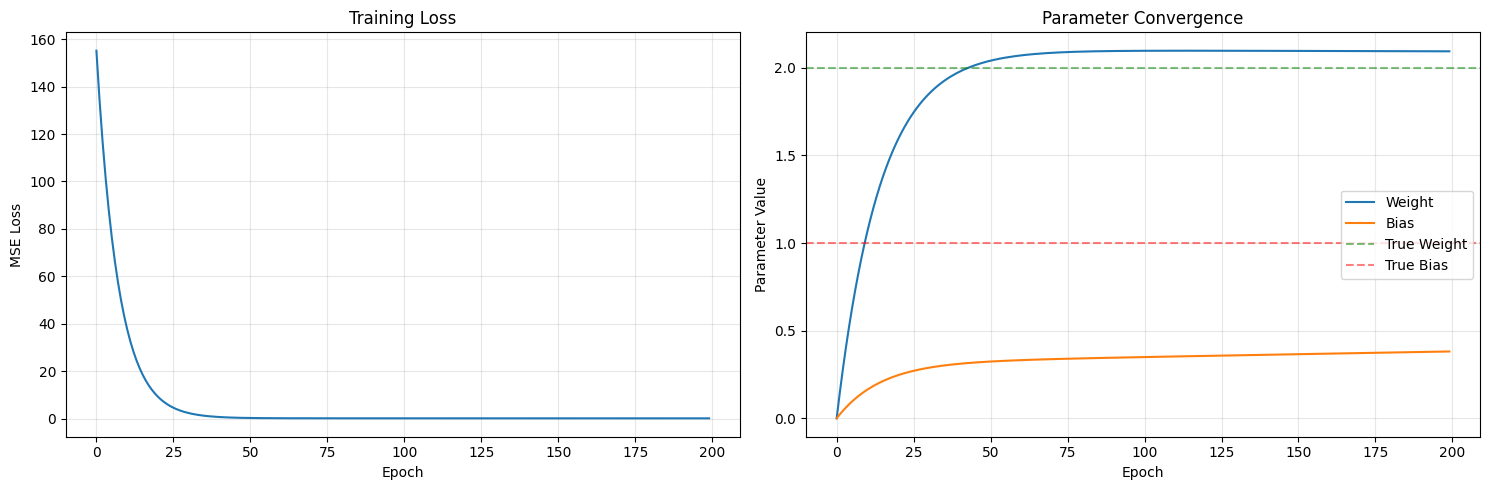

❌ Error checking mse_loss: must be real number, not dict
✅ final_weight is correct!
❌ final_bias has incorrect value. Expected 1.0000, got 0.3818
❌ final_loss has incorrect value. Expected 0.0100, got 0.1095


In [ ]:
# Exercise 2: Computing Loss and Training a Single Neuron 🎯
# Implement:
# 1. A Mean Squared Error (MSE) loss function
# 2. Visualize a linear regression task using a single neuron
# 3. Explore how adjusting weights and bias affects the predictions and loss

from ipywidgets import interact, FloatSlider

def mse_loss(y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
    """Compute Mean Squared Error loss between predictions and targets"""
    # MSE formula: 1/n * sum((y_true - y_pred)^2)
    return torch.mean((y_true - y_pred) ** 2)

# Generate a simple dataset: y = 2x + 1 + small random noise
torch.manual_seed(42)  # For reproducibility
x = torch.linspace(0, 10, 100).reshape(-1, 1)
true_weight = 2.0
true_bias = 1.0
y_true = true_weight * x + true_bias + 0.1 * torch.randn_like(x)

# Create a single neuron (no activation function for linear regression)
class LinearNeuron:
    def __init__(self, weight=0.0, bias=0.0):
        self.weight = torch.tensor([weight], requires_grad=True)
        self.bias = torch.tensor([bias], requires_grad=True)
    
    def forward(self, x):
        return x * self.weight + self.bias
    
    def parameters(self):
        return [self.weight, self.bias]

# Create a function to visualize the predictions vs actual data
def plot_regression(neuron, x, y_true, loss=None):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the data points
    ax.scatter(x.numpy(), y_true.numpy(), alpha=0.5, label='Data Points')
    
    # Plot the true line
    ax.plot(x.numpy(), true_weight * x.numpy() + true_bias, 'g-', linewidth=2, label='True Line (y = 2x + 1)')
    
    # Get predictions and plot the current line
    y_pred = neuron.forward(x)
    current_weight = neuron.weight.item()
    current_bias = neuron.bias.item()
    ax.plot(x.numpy(), y_pred.detach().numpy(), 'r--', linewidth=2, 
            label=f'Current Prediction (y = {current_weight:.2f}x + {current_bias:.2f})')
    
    # Add loss information if provided
    if loss is not None:
        ax.set_title(f'Linear Regression with MSE Loss: {loss:.4f}')
    else:
        ax.set_title('Linear Regression')
    
    # Add grid, legend, and labels
    ax.grid(True, alpha=0.3)
    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    # Plot error visualization
    for i in range(0, len(x), 10):  # Plot error lines for every 10th point to avoid clutter
        xi = x[i].item()
        y_true_i = y_true[i].item()
        y_pred_i = y_pred[i].item()
        ax.plot([xi, xi], [y_true_i, y_pred_i], 'b-', alpha=0.3)
    
    plt.tight_layout()
    return fig, ax

# Create an interactive function to adjust weight and bias
def interactive_regression(weight=0.0, bias=0.0):
    neuron = LinearNeuron(weight, bias)
    y_pred = neuron.forward(x)
    loss = mse_loss(y_pred, y_true).item()
    
    plot_regression(neuron, x, y_true, loss)
    plt.tight_layout()
    plt.show()

# Use interactive widgets to adjust weight and bias
interact(
    interactive_regression,
    weight=FloatSlider(min=-1.0, max=5.0, step=0.1, value=0.0, description='Weight:'),
    bias=FloatSlider(min=-2.0, max=4.0, step=0.1, value=0.0, description='Bias:')
)

# Now let's implement a function to train the neuron with gradient descent
def train_neuron(neuron, x, y_true, learning_rate=0.01, epochs=100):
    losses = []
    weights = []
    biases = []
    
    for epoch in range(epochs):
        # Forward pass
        y_pred = neuron.forward(x)
        loss = mse_loss(y_pred, y_true)
        losses.append(loss.item())
        
        # Record current parameters
        weights.append(neuron.weight.item())
        biases.append(neuron.bias.item())
        
        # Backward pass
        loss.backward()
        
        # Update parameters (manual gradient descent)
        with torch.no_grad():
            neuron.weight -= learning_rate * neuron.weight.grad
            neuron.bias -= learning_rate * neuron.bias.grad
        
        # Zero gradients for next iteration
        neuron.weight.grad.zero_()
        neuron.bias.grad.zero_()
    
    return neuron, losses, weights, biases

# Train the neuron
trained_neuron = LinearNeuron()
trained_neuron, losses, weights, biases = train_neuron(trained_neuron, x, y_true, learning_rate=0.001, epochs=200)

# Plot the final result
final_y_pred = trained_neuron.forward(x)
final_loss = mse_loss(final_y_pred, y_true).item()
plot_regression(trained_neuron, x, y_true, final_loss)
plt.title(f'Trained Neuron (Weight: {trained_neuron.weight.item():.4f}, Bias: {trained_neuron.bias.item():.4f}, MSE: {final_loss:.4f})')
plt.show()

# Plot the training progress
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot loss
ax1.plot(losses)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('MSE Loss')
ax1.set_title('Training Loss')
ax1.grid(True, alpha=0.3)

# Plot parameter convergence
ax2.plot(weights, label='Weight')
ax2.plot(biases, label='Bias')
ax2.axhline(y=true_weight, color='g', linestyle='--', alpha=0.5, label='True Weight')
ax2.axhline(y=true_bias, color='r', linestyle='--', alpha=0.5, label='True Bias')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Parameter Value')
ax2.set_title('Parameter Convergence')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Check your answer
answer = {
    'mse_loss': mse_loss,
    'final_weight': trained_neuron.weight.item(),
    'final_bias': trained_neuron.bias.item(),
    'final_loss': final_loss
}
checker.check_exercise(2, answer)

## Understanding the Linear Neuron Training

In this exercise, we've trained a simple neuron to learn a linear relationship. Let's break down what happened:

1. **Data Generation**: We created a dataset where $y = 2x + 1$ with some added noise
2. **Neural Model**: We implemented a linear neuron (no activation function) with adjustable weight and bias
3. **Interactive Exploration**: Using sliders, we manually adjusted parameters to see how they affect predictions
4. **Gradient Descent**: We implemented automatic training with gradient descent to find optimal parameters
5. **Visualization**: We plotted the training progress, showing how the loss decreases and parameters converge

### Key Observations:

- **Errors Visualization**: The blue vertical lines show the difference between predictions and true values
- **Loss Curve**: Shows how the error decreases during training
- **Parameter Convergence**: Shows how weight and bias approach their true values (2.0 and 1.0)

### Connecting to Neural Networks:

This exercise demonstrates the fundamental concept of neural network training:
1. Start with random parameters
2. Make predictions and compute error
3. Use gradients to adjust parameters in the direction that reduces error
4. Repeat until convergence

The linear neuron is the simplest form of neural network unit. More complex networks add:
- Multiple neurons per layer
- Multiple layers (depth)
- Non-linear activation functions

Next, we'll see how these additions allow networks to model more complex, non-linear relationships.

## Parameter Updates and Backpropagation
***
> <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> **Definition**: Backpropagation is the algorithm used to calculate gradients in neural networks, which are then used to update parameters.

In Exercise 2, we saw that a single neuron can't learn the XOR function, but how do we systematically improve a neural network? We need to update its weights and biases based on the error.

### The Gradient Descent Algorithm

Gradient descent is an optimization algorithm that iteratively adjusts the model parameters (weights and biases) to minimize the loss function. The process works as follows:

1. **Compute predictions**: The model makes predictions using the current parameters
2. **Calculate loss**: We measure how far these predictions are from the true values
3. **Compute gradients**: We calculate how much the loss would change if we change each parameter by a small amount
4. **Update parameters**: We adjust each parameter in the direction that reduces the loss

The parameter update rule is:

$$ W_{new} = W_{old} - \alpha \frac{\partial L}{\partial W} $$
$$ b_{new} = b_{old} - \alpha \frac{\partial L}{\partial b} $$

Where:
- $W$ and $b$ are the weights and biases
- $\alpha$ is the learning rate (controls step size)
- $\frac{\partial L}{\partial W}$ and $\frac{\partial L}{\partial b}$ are the gradients of the loss with respect to weights and biases

### PyTorch's Autograd System

PyTorch makes this process easier with automatic differentiation:

1. The `requires_grad=True` flag tells PyTorch to track operations on these tensors
2. The `backward()` method computes all the gradients automatically
3. Gradients are stored in the `.grad` attribute of each tensor
4. We must manually zero gradients between updates using `.grad.zero_()`

### Multi-Layer Neural Networks

As we observed in Exercise 2, a single neuron cannot learn certain patterns like XOR. This is because XOR is not linearly separable - we can't draw a single straight line to separate the classes.

To overcome this limitation, we need to use multiple neurons arranged in layers:

1. **Input layer**: Receives the features
2. **Hidden layer(s)**: Processes information with multiple neurons
3. **Output layer**: Produces the final prediction

This architecture gives the network more capacity to learn complex, non-linear relationships.

Let's implement a multi-layer neural network using PyTorch's built-in modules and train it to solve the XOR problem.

### Training Neural Networks

Training a neural network involves iteratively adjusting its parameters (weights and biases) to minimize the loss function. This process typically consists of several steps repeated over many epochs:

1. **Forward pass**: Compute the network's predictions given the current parameters
2. **Loss calculation**: Measure the error between predictions and true values
3. **Backward pass**: Compute the gradients of the loss with respect to parameters
4. **Parameter update**: Adjust parameters in the direction that reduces loss

The parameter update usually follows the gradient descent algorithm:

```
new_weight = old_weight - learning_rate * gradient
```

Where:
- **learning_rate** controls the step size of updates
- **gradient** is the derivative of the loss with respect to the parameter

For a multi-layer network, backpropagation allows us to efficiently compute gradients throughout the network by applying the chain rule of calculus. Starting from the loss at the output layer, gradients are propagated backward through the network to update all parameters.

Let's implement a multi-layer neural network to solve the XOR problem that we couldn't solve with a single neuron.

In [10]:
# Exercise 3: Implementing a Multi-Layer Neural Network for XOR 🎯
# Implement a neural network with at least one hidden layer to solve the XOR problem

## Key Takeaways

We've learned the fundamental concepts behind neural networks through our exploration of the XOR problem:

1. **Single Neurons**: Can only solve linearly separable problems
2. **Multi-Layer Networks**: Required for complex tasks like XOR, which need non-linear decision boundaries
3. **Backpropagation**: Allows efficient gradient calculation throughout the network
4. **Gradient Descent**: Updates parameters to minimize loss
5. **Capacity vs. Complexity**: Neural networks need sufficient capacity (hidden neurons) to model complex relationships

The XOR problem demonstrates a key insight in neural networks: the addition of hidden layers enables the model to transform the input space in ways that make non-linearly separable problems solvable.

### Deep Learning Extensions

While we built a neural network from scratch for learning purposes, most practical applications use established frameworks like PyTorch or TensorFlow with additional features:

- More advanced optimizers (Adam, RMSProp)
- Different activation functions (ReLU, LeakyReLU, etc.)
- Regularization techniques (dropout, batch normalization)
- Convolutional and recurrent architectures for specific tasks

These building blocks allow deep learning engineers to create increasingly complex models for solving challenging real-world problems.